In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from PIL import ImageFilter
from collections import Counter

In [29]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['/Users/alysaschoenfelder/Library/Fonts/Goldoni_DEMO.otf',
 '/Users/alysaschoenfelder/Library/Fonts/SakeMoru-Regular.otf',
 '/Library/Fonts/Kurale_Regular.ttf',
 '/System/Library/Fonts/Supplemental/Courier New Italic.ttf',
 '/Users/alysaschoenfelder/Library/Fonts/REWARD PERSONAL USE.ttf',
 '/Library/Fonts/PT_Sans_Web_Bold.ttf',
 '/System/Library/Fonts/SFArabic.ttf',
 '/Users/alysaschoenfelder/Library/Fonts/Popstone-Regular.ttf',
 '/Users/alysaschoenfelder/Library/Fonts/Euro Western.otf',
 '/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf',
 '/Users/alysaschoenfelder/Library/Fonts/CircusFreak-ShadowStroke.otf',
 '/Users/alysaschoenfelder/Library/Fonts/PopstoneVariableGX.ttf',
 '/Users/alysaschoenfelder/Library/Fonts/SfGrooveMachine-LEgZ.ttf',
 '/System/Library/Fonts/Supplemental/Shree714.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOldHungarian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/PTSans.ttc',
 '/System/Library/Fonts/Supplemental/NotoSerifAhom-Regular.ttf'

In [2]:
data= pd.read_csv('/Users/alysaschoenfelder/Downloads/airbnb_clean_3.csv')

In [3]:
data

id                                               Name  \
0        2431241                  Beautiful Central Harlem sleeps 4   
1        3877162      Bushwick Room w/ Private Entrance & Bathroom!   
2        5117628  Sun-filled bedroom in East Village / Gramercy NYC   
3        6416638                Private room in hip & historic area   
4        6637005                 1BR GARDEN APT 25 MIN TO MANHATTAN   
...          ...                                                ...   
102594  57361342             Sunny budget friendly room in Bushwick   
102595  57361894            Cozy Apartment on Bedford Ave, Brooklyn   
102596  57362446                Your 1 bedroom home away from home!   
102597  57362999  MASTER Cozy Bedroom Queen size 2 blocks Timesq...   
102598  57363551        Sunny Brownstone Studio in BedStuy Brooklyn   

          Borough       Neighbourhood       Lat       Lon Instant_Booking  \
0       Manhattan              Harlem  40.80861 -73.94574           False   
1        Brooklyn            Bushwick  40.70322 -73.92913            True   
2       Manhattan            Gramercy  40.73170 -73.98272            True   
3        Brooklyn  Bedford-Stuyvesant  40.68346 -73.95551           False   
4        Brooklyn       East Flatbush  40.64569 -73.94776           False   
...           ...                 ...       ...       ...             ...   
102594   Brooklyn            Bushwick  40.69370 -73.91006            True   
102595   Brooklyn        Williamsburg  40.71284 -73.96284           False   
102596  Manhattan     Upper West Side  40.79563 -73.97634            True   
102597  Manhattan      Hell's Kitchen  40.76125 -73.98945            True   
102598   Brooklyn  Bedford-Stuyvesant  40.68221 -73.94618           False   

       Cancellation_Policy        Room_Type  Construction_Year  \
0                 moderate  Entire home/apt             2014.0   
1                   strict     Private room             2020.0   
2                   strict     Private room             2009.0   
3                   strict     Private room             2017.0   
4                 moderate  Entire home/apt             2008.0   
...                    ...              ...                ...   
102594            flexible     Private room             2016.0   
102595            moderate     Private room             2005.0   
102596            flexible  Entire home/apt             2010.0   
102597              strict  Entire home/apt             2020.0   
102598            moderate  Entire home/apt             2016.0   

        Price_Per_Night  Total_Reviews  Rating  \
0                1200.0          123.0     1.0   
1                1200.0           16.0     1.0   
2                1200.0          136.0     2.0   
3                1200.0           30.0     1.0   
4                1200.0           29.0     4.0   
...                 ...            ...     ...   
102594              NaN            3.0     1.0   
102595              NaN           15.0     4.0   
102596              NaN           38.0     3.0   
102597              NaN           81.0     2.0   
102598              NaN          104.0     5.0   

                                              House_Rules  
0       No smoking in the unit ( strict)  No pets (str...  
1                            No smoking in the apartment.  
2       We live on the 3rd floor of a 3-family house, ...  
3                                                     NaN  
4                                                  #NAME?  
...                                                   ...  
102594  Please be mindful that I live in the same buil...  
102595                                                NaN  
102596                                                NaN  
102597  - I work at home and prefer to rent to folks w...  
102598                                                NaN  

[102599 rows x 14 columns]

In [4]:
stop_words = ['in', '1', 'the', 'to', '2', 'with', 'of', 'and', 'w', 'a', 'from', '3', 'for']

In [5]:
data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True,
                      background_color='white',
                     width=800, height=400).generate(text_data)

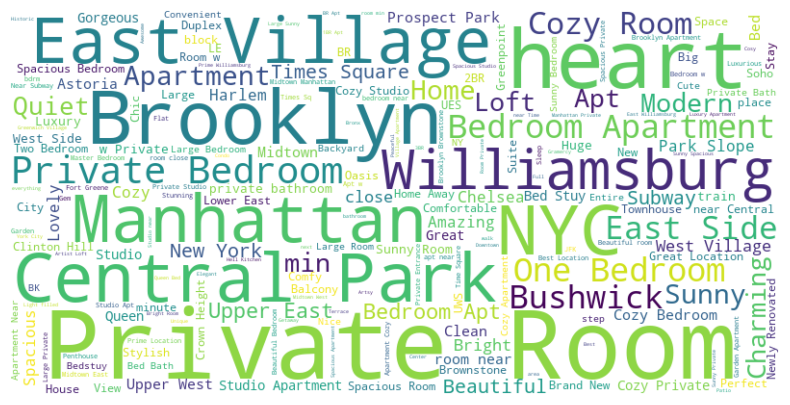

In [6]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [7]:
text_dictionary = wordcloud.process_text(text_data)
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}
rel_freq=wordcloud.words_   
print(list(word_freq.items())[:25])
print(list(rel_freq.items())[:25])

[('Private Room', 6200), ('heart', 4174), ('Brooklyn', 3486), ('NYC', 2916), ('Central Park', 2818), ('Manhattan', 2630), ('East Village', 2497), ('Williamsburg', 2382), ('Private Bedroom', 2145), ('Bedroom Apartment', 2095), ('One Bedroom', 2076), ('East Side', 1921), ('Bushwick', 1872), ('Cozy Room', 1848), ('Apartment', 1753), ('Home', 1723), ('Sunny', 1662), ('Charming', 1576), ('Apt', 1531), ('min', 1517), ('Modern', 1512), ('Loft', 1496), ('Quiet', 1397), ('Upper East', 1378), ('Bedroom Apt', 1365)]
[('Private Room', 1.0), ('heart', 0.6732258064516129), ('Brooklyn', 0.562258064516129), ('NYC', 0.4703225806451613), ('Central Park', 0.4545161290322581), ('Manhattan', 0.4241935483870968), ('East Village', 0.402741935483871), ('Williamsburg', 0.3841935483870968), ('Private Bedroom', 0.34596774193548385), ('Bedroom Apartment', 0.3379032258064516), ('One Bedroom', 0.33483870967741935), ('East Side', 0.30983870967741933), ('Bushwick', 0.30193548387096775), ('Cozy Room', 0.29806451612903

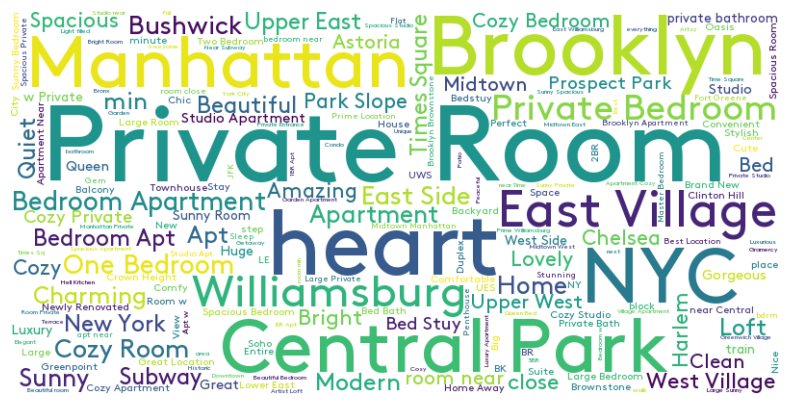

In [8]:
data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

# Define a sans-serif font
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

# Create the word cloud with the specified font
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

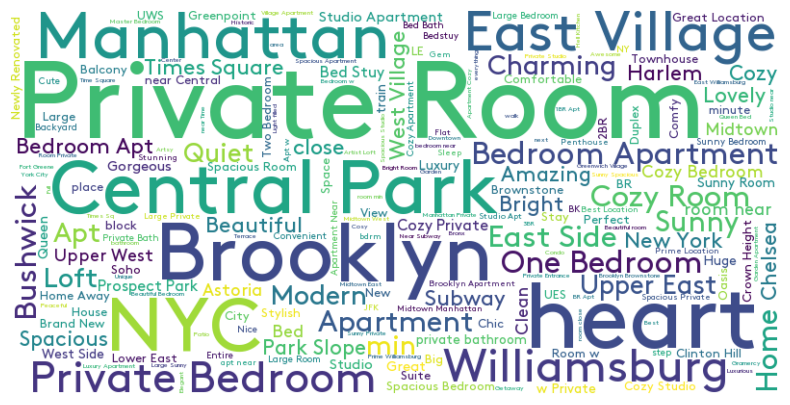

In [9]:
data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

# Define a sans-serif font
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

# Create the word cloud with the specified font
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path, 
    stopwords = STOPWORDS,
    collocations=True,
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

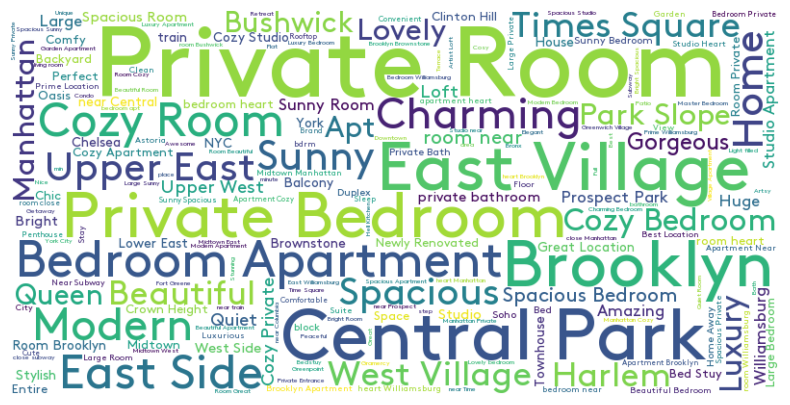

In [10]:
data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

filtered_words = [word for word in text_data.split() if len(word) > 3]
filtered_text = ' '.join(filtered_words)

font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,
    stopwords=STOPWORDS,
    collocations=True,
).generate(filtered_text)


# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

def create_word_cloud(text_data, title):
    wordcloud = WordCloud(width=800,
                          height=400, 
                          background_color='white',  
                          font_path=font_path,
                         stopwords=STOPWORDS,
                         collocations=True,
                         ).generate(text_data)
   

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()

grouped_data = data.groupby('Rating')

for group, group_data in grouped_data:
    text_data = ' '.join(group_data['Name'].astype(str))
    create_word_cloud(text_data, f'Word Cloud for {Rating}')

NameError: name 'Rating' is not defined

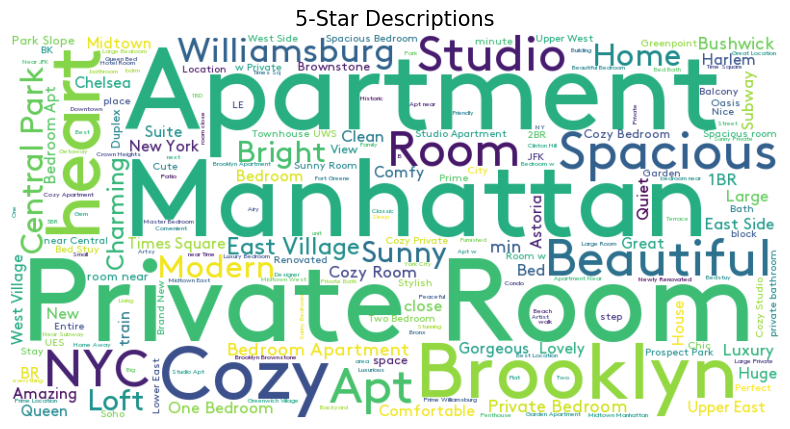

In [13]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

five_star = data[data['Rating'] == 5]

text_data = ' '.join(five_star['Name'].astype(str))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                     font_path=font_path,
                    stopwords=STOPWORDS,
                    collocations=True,).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('5-Star Descriptions', fontsize=15)
plt.axis("off")
plt.show()

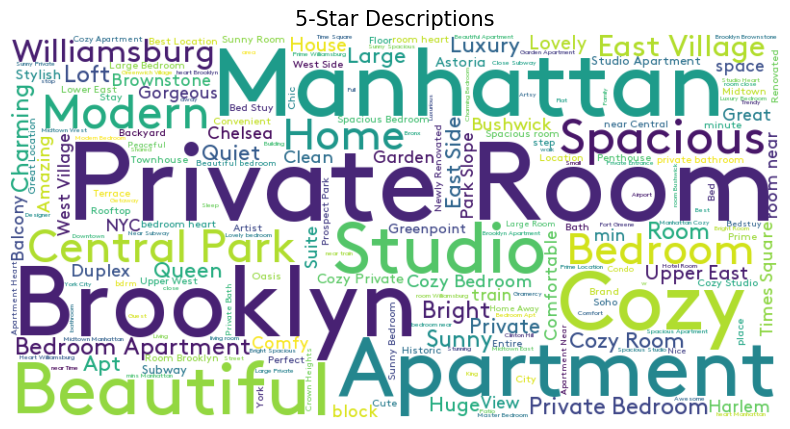

In [14]:
filtered_words = [word for word in text_data.split() if len(word) > 3]
filtered_text = ' '.join(filtered_words)

font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

five_star = data[data['Rating'] == 5]

text_data = ' '.join(five_star['Name'].astype(str))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                     font_path=font_path,
                    stopwords=STOPWORDS,
                    collocations=True,).generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('5-Star Descriptions', fontsize=15)
plt.axis("off")
plt.show()

In [15]:
from PIL import Image


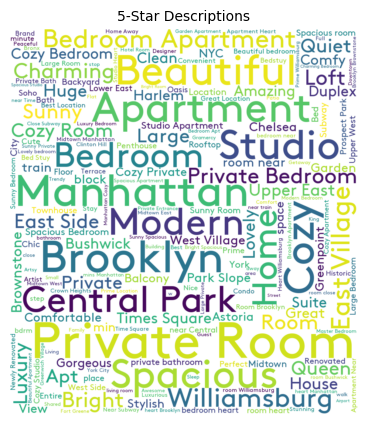

In [16]:
filtered_words = [word for word in text_data.split() if len(word) > 3]
filtered_text = ' '.join(filtered_words)

font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

five_star = data[data['Rating'] == 5]

text_data = ' '.join(five_star['Name'].astype(str))

mask_path = "/Users/alysaschoenfelder/Downloads/up_mask.png"
mask = np.array(Image.open(mask_path))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                     font_path=font_path,
                    stopwords=STOPWORDS,
                    collocations=True,
                     mask=mask,).generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('5-Star Descriptions', fontsize=10)
plt.axis("off")
plt.show()

In [17]:
mask = np.array(Image.open("/Users/alysaschoenfelder/Downloads/up_mask.png"))
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [18]:


def transform_zeros(val):
    if val == 0:
        return 255
    
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
maskable_image


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [19]:
mask = np.array(Image.open("/Users/alysaschoenfelder/Downloads/up_mask.png"))
mask


def transform_zeros(array):
    return np.where(array == 0, 255, array)

maskable_image = np.apply_along_axis(transform_zeros, 1, mask)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

mask

    


array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [20]:
filtered_words = [word for word in text_data.split() if len(word) > 3]
filtered_text = ' '.join(filtered_words)

font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

five_star = data[data['Rating'] == 5]

text_data = ' '.join(five_star['Name'].astype(str))

mask_path = "/Users/alysaschoenfelder/Downloads/up_mask.png"
up_mask = np.array(Image.open(mask_path))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                     font_path=font_path,
                    stopwords=STOPWORDS,
                    collocations=True,
                     mask=up_mask,).generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear', up_mask,)
plt.title('5-Star Descriptions', fontsize=10)
plt.axis("off")
plt.show()

SyntaxError: positional argument follows keyword argument (2834437742.py, line 22)

In [111]:
up_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/upvote.png'))

In [113]:

def draw_contour(img, mask, contour_width, contour_color):
    """Draw mask contour on a pillow image."""
    contour = Image.fromarray(up_mask)
    contour = contour.resize(img.size)
    contour = contour.filter(ImageFilter.FIND_EDGES)
    contour = np.array(contour)

 
    contour[[0, -1], :] = 0
    contour[:, [0, -1]] = 0


    radius = contour_width / 10
    contour = Image.fromarray(contour)
    contour = contour.filter(ImageFilter.GaussianBlur(radius=radius))
    contour = np.array(contour) > 0
    contour = np.dstack((contour, contour, contour))


    ret = np.array(img) * np.invert(contour)
    if contour_color != 'black':
        color = Image.new(img.mode, img.size, contour_color)
        ret += np.array(color) * contour

    return Image.fromarray(ret)


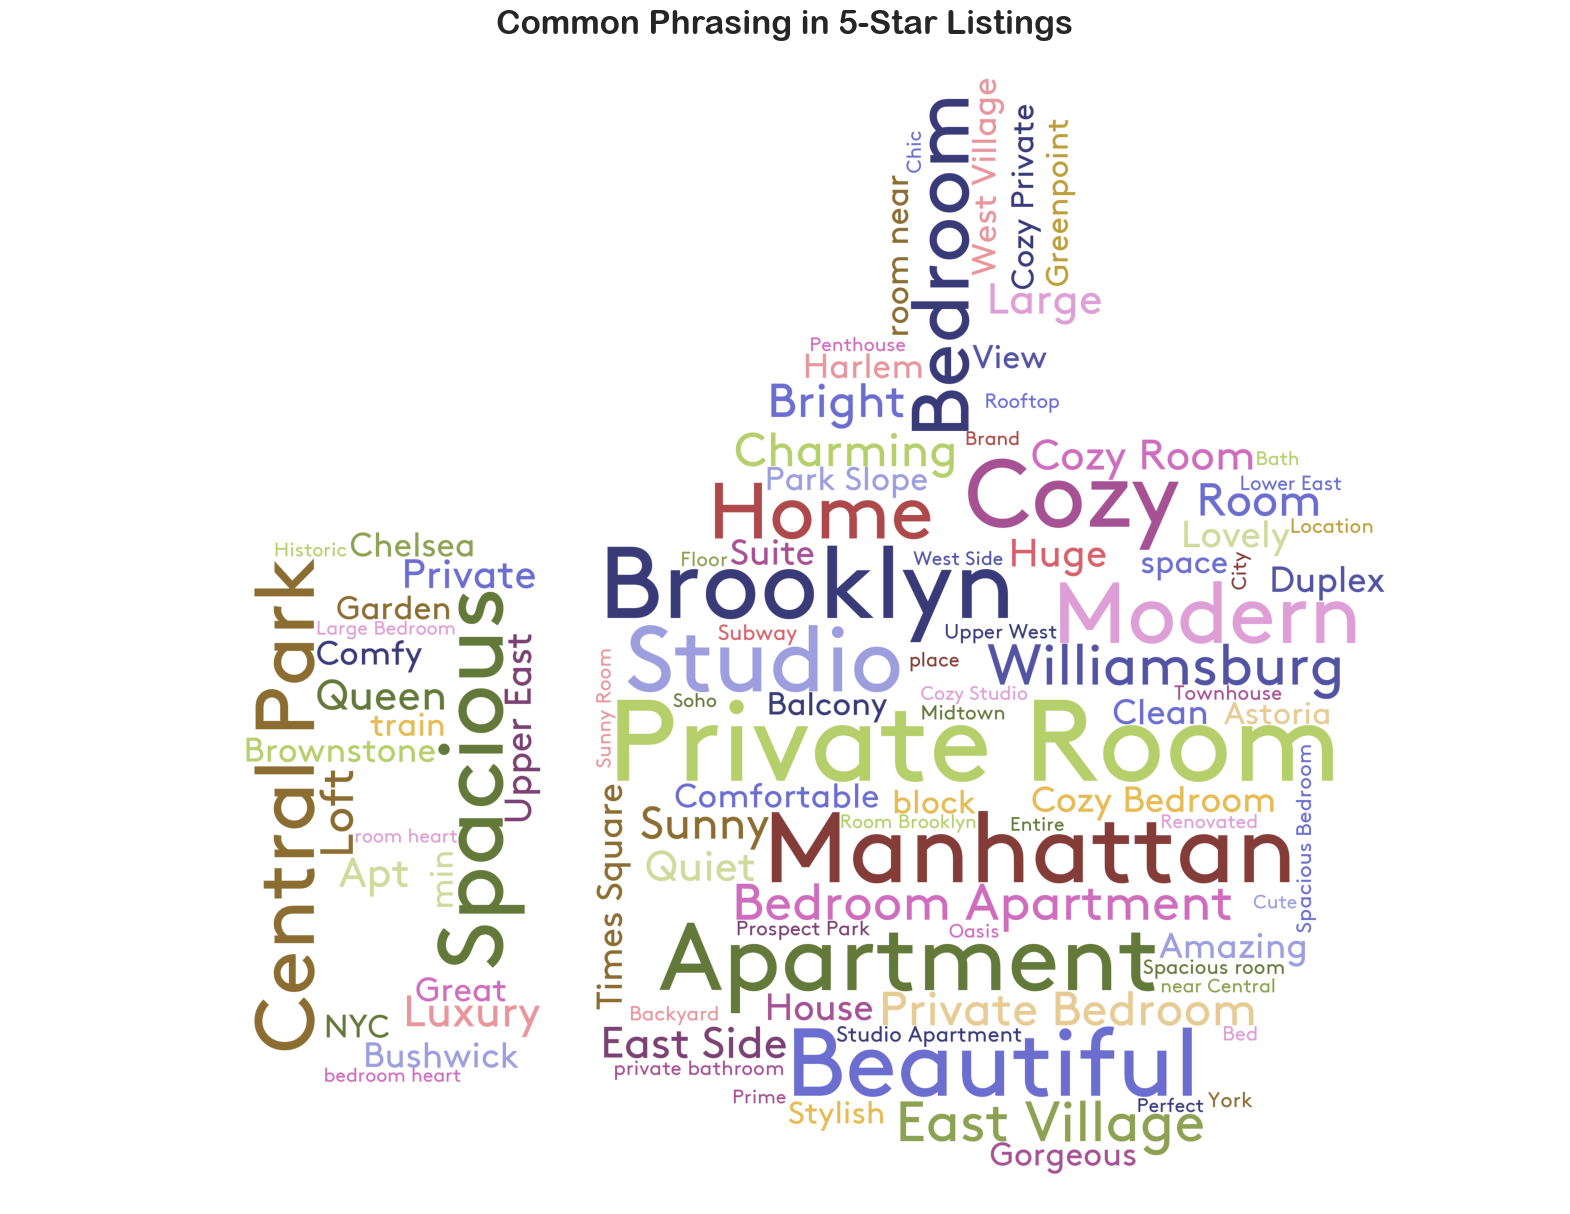

In [164]:
filtered_words = [word for word in text_data.split() if len(word) >= 4]
filtered_text = ' '.join(filtered_words)

font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

five_star = data[data['Rating'] == 5]

up_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/upvote.png'))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                     font_path=font_path,
                    stopwords=STOPWORDS,
                      colormap='tab20b',
                    collocations=True,
                      max_words=100,
                     mask=up_mask,).generate(filtered_text)

plt.subplots(figsize=(20,20))
plt.clf()
plt.imshow(wordcloud)
plt.title('Common Phrasing in 5-Star Listings',fontname='Arial Rounded MT Bold', fontsize=24)
plt.axis('off')
plt.show()


In [ ]:
filtered_words = [word for word in text_data.split() if len(word) >= 4]
filtered_text = ' '.join(filtered_words)

font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

five_star = data[data['Rating'] == 5]

up_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/upvote.png'))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                     font_path=font_path,
                    stopwords=STOPWORDS,
                      colormap='tab20',
                    collocations=True,
                      max_words=75,
                     mask=up_mask,).generate(filtered_text)

plt.subplots(figsize=(30,30))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


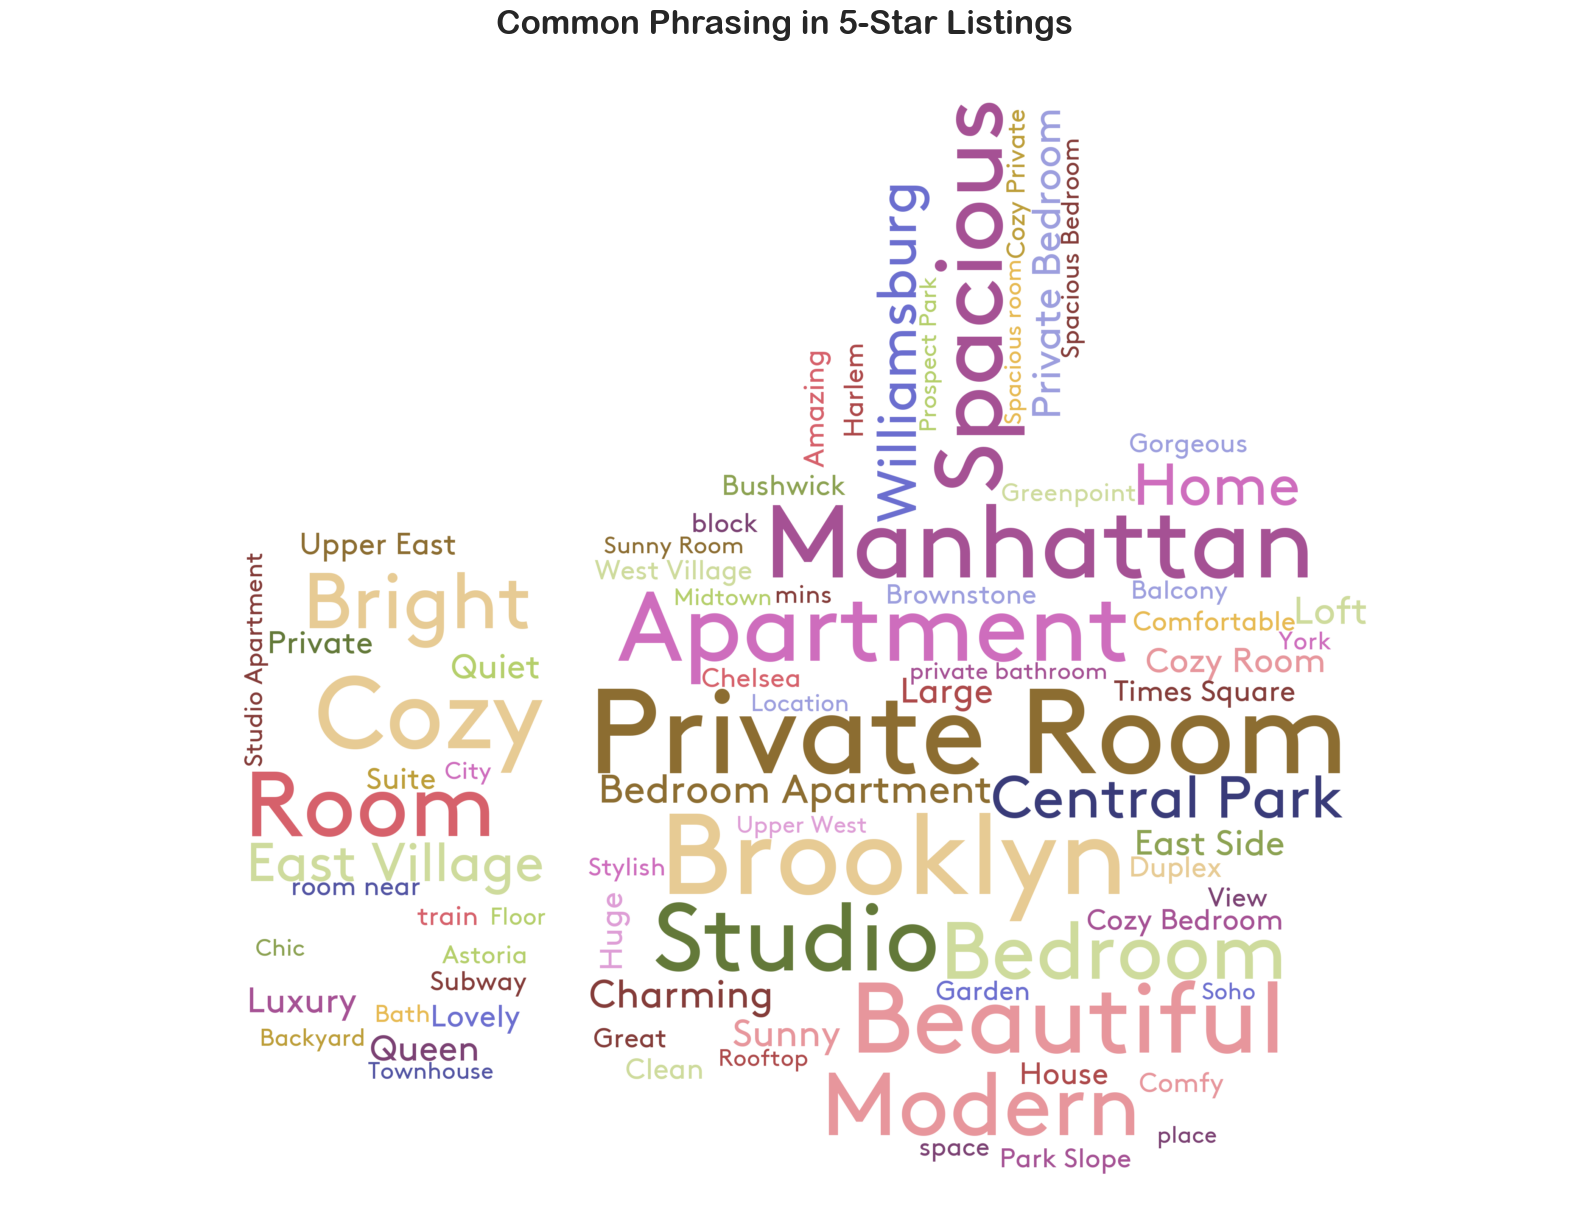

In [166]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

five_star = data[data['Rating'] == 5]

text_data = ' '.join(five_star['Name'].astype(str))

up_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/upvote.png'))

wordcloud = WordCloud(
                      background_color='white',
                      mask=up_mask,
                     font_path=font_path,
                    stopwords=STOPWORDS,
                    collocations=True,
                      colormap='tab20b',
                      max_words=80,
                      min_word_length=4,
                     
                     
                     ).generate(text_data)

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Common Phrasing in 5-Star Listings',fontname='Arial Rounded MT Bold', fontsize=24)
plt.axis("off")
plt.show()



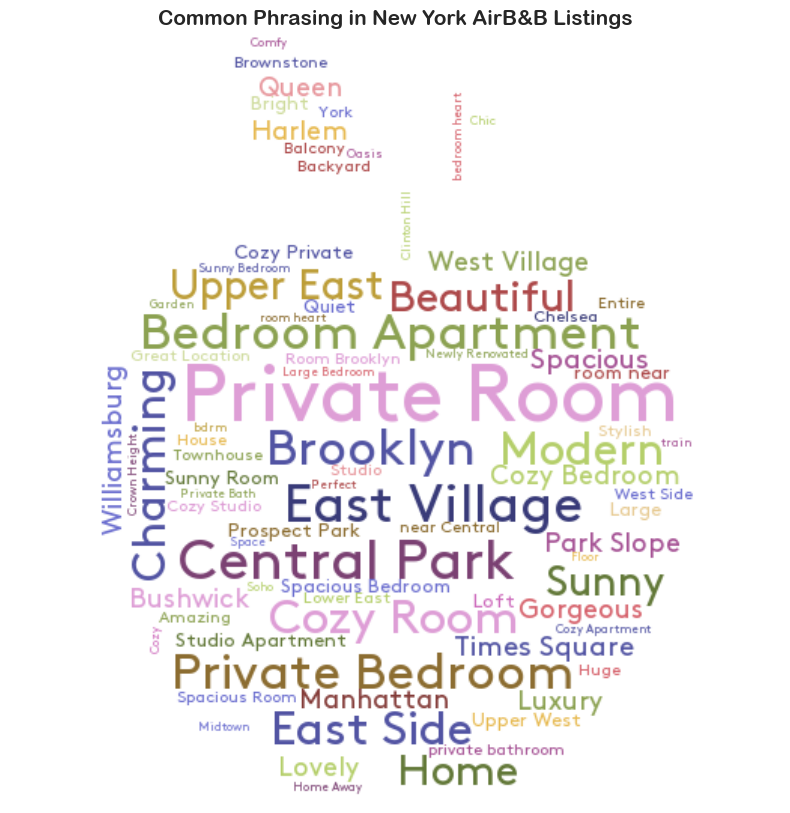

In [165]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

apple_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

custom_mask = np.where(apple_mask == 0, 255, 0)

wordcloud = WordCloud(
    font_path=font_path,
    stopwords=STOPWORDS,
    collocations=True,
    colormap='tab20b',
    max_words=80,
    min_word_length=4,
    mask=custom_mask,
    background_color='white', 
    
)

wordcloud.generate(text_data)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Common Phrasing in New York AirB&B Listings',fontname='Arial Rounded MT Bold', fontsize=15)
plt.axis("off")
plt.show()

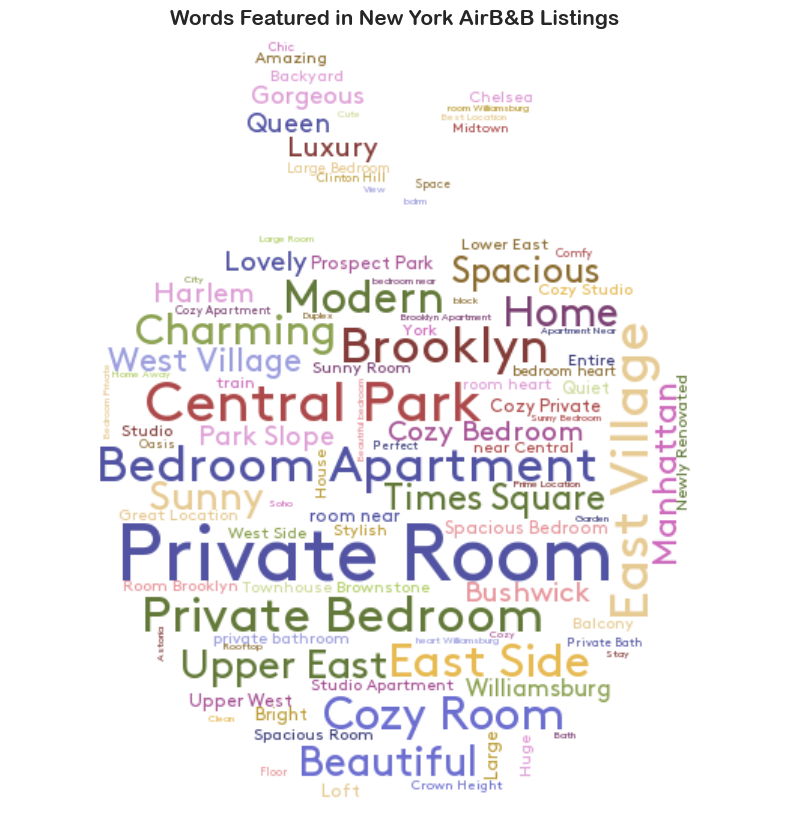

In [149]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

apple_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

custom_mask = np.where(apple_mask == 0, 255, 0)

wordcloud = WordCloud(
    font_path=font_path,
    stopwords=STOPWORDS,
    collocations=True,
    colormap='tab20b',
    max_words=100,
    min_word_length=4,
    mask=custom_mask,
    background_color='white', 
    
)

wordcloud.generate(text_data)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Words Featured in New York AirB&B Listings',fontname='Arial Rounded MT Bold', fontsize=15)
plt.axis("off")
plt.show()

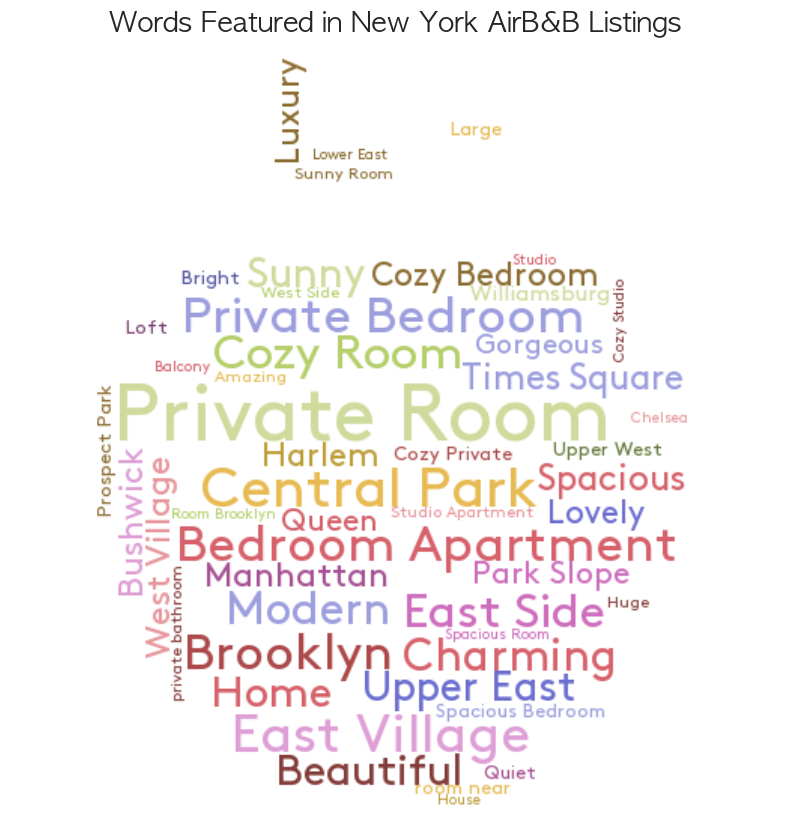

In [126]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

apple_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

custom_mask = np.where(apple_mask == 0, 255, 0)

wordcloud = WordCloud(
    font_path=font_path,
    stopwords=STOPWORDS,
    collocations=True,
    colormap='tab20b',
    max_words=50,
    min_word_length=4,
    mask=custom_mask,
    background_color='white', 
    
)

wordcloud.generate(text_data)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Words Featured in New York AirB&B Listings', fontname='AppleGothic',fontsize=20, fontweight='bold')
plt.axis("off")
plt.show()

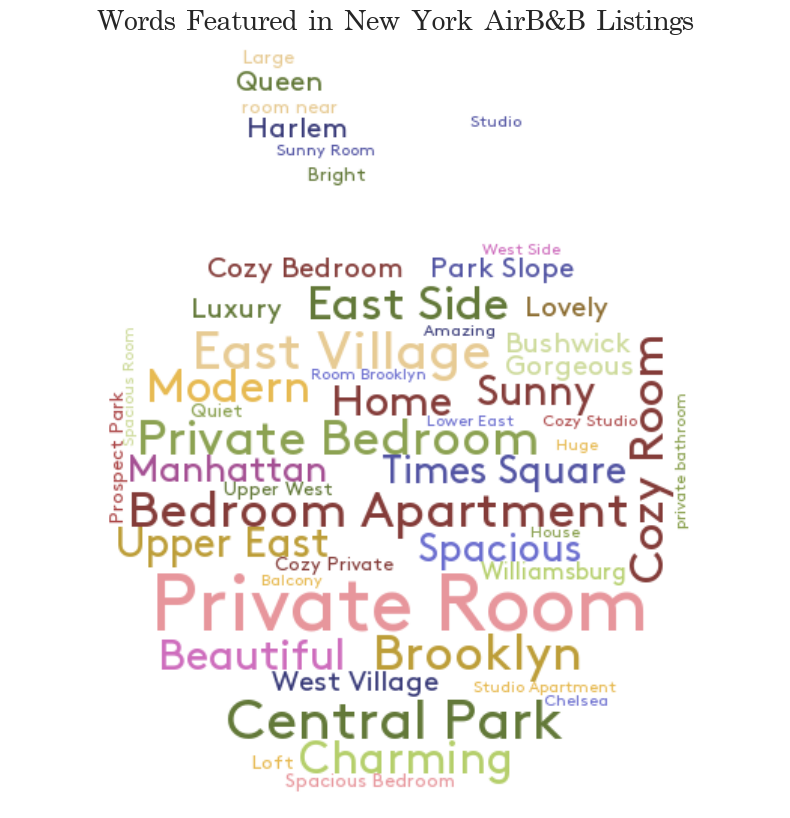

In [125]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

apple_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

custom_mask = np.where(apple_mask == 0, 255, 0)

wordcloud = WordCloud(
    font_path=font_path,
    stopwords=STOPWORDS,
    collocations=True,
    colormap='tab20b',
    max_words=50,
    min_word_length=4,
    mask=custom_mask,
    background_color='white', 
    
)

wordcloud.generate(text_data)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Words Featured in New York AirB&B Listings', fontname='AppleMyungjo',fontsize=20)
plt.axis("off")
plt.show()

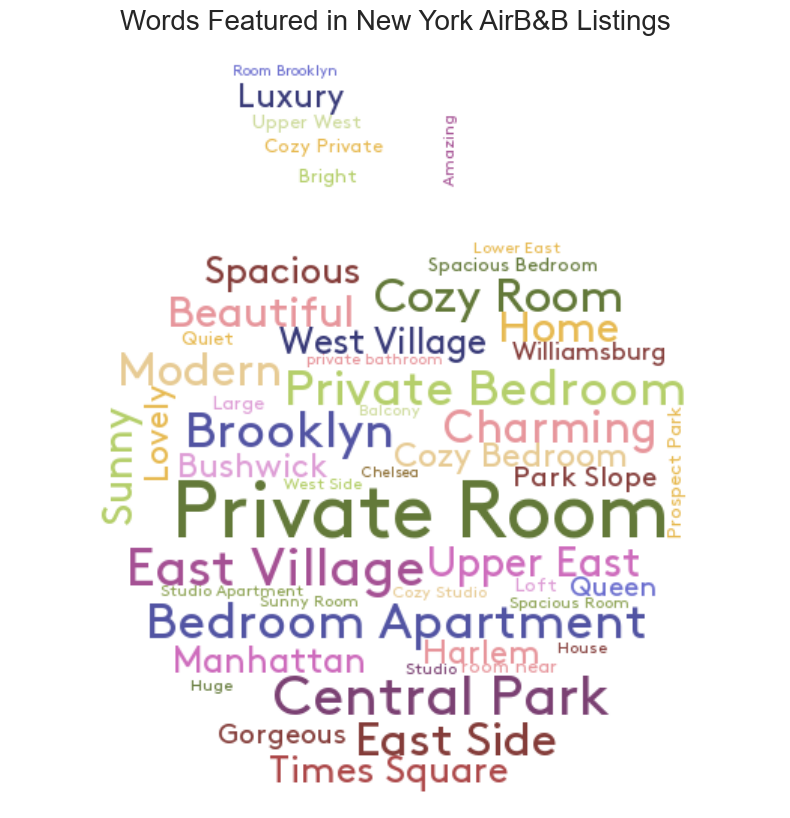

In [118]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

apple_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

custom_mask = np.where(apple_mask == 0, 255, 0)

wordcloud = WordCloud(
    font_path=font_path,
    stopwords=STOPWORDS,
    collocations=True,
    colormap='tab20b',
    max_words=50,
    min_word_length=4,
    mask=custom_mask,
    background_color='white', 
    
)

wordcloud.generate(text_data)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Words Featured in New York AirB&B Listings', fontsize=20)
plt.axis("off")
plt.show()

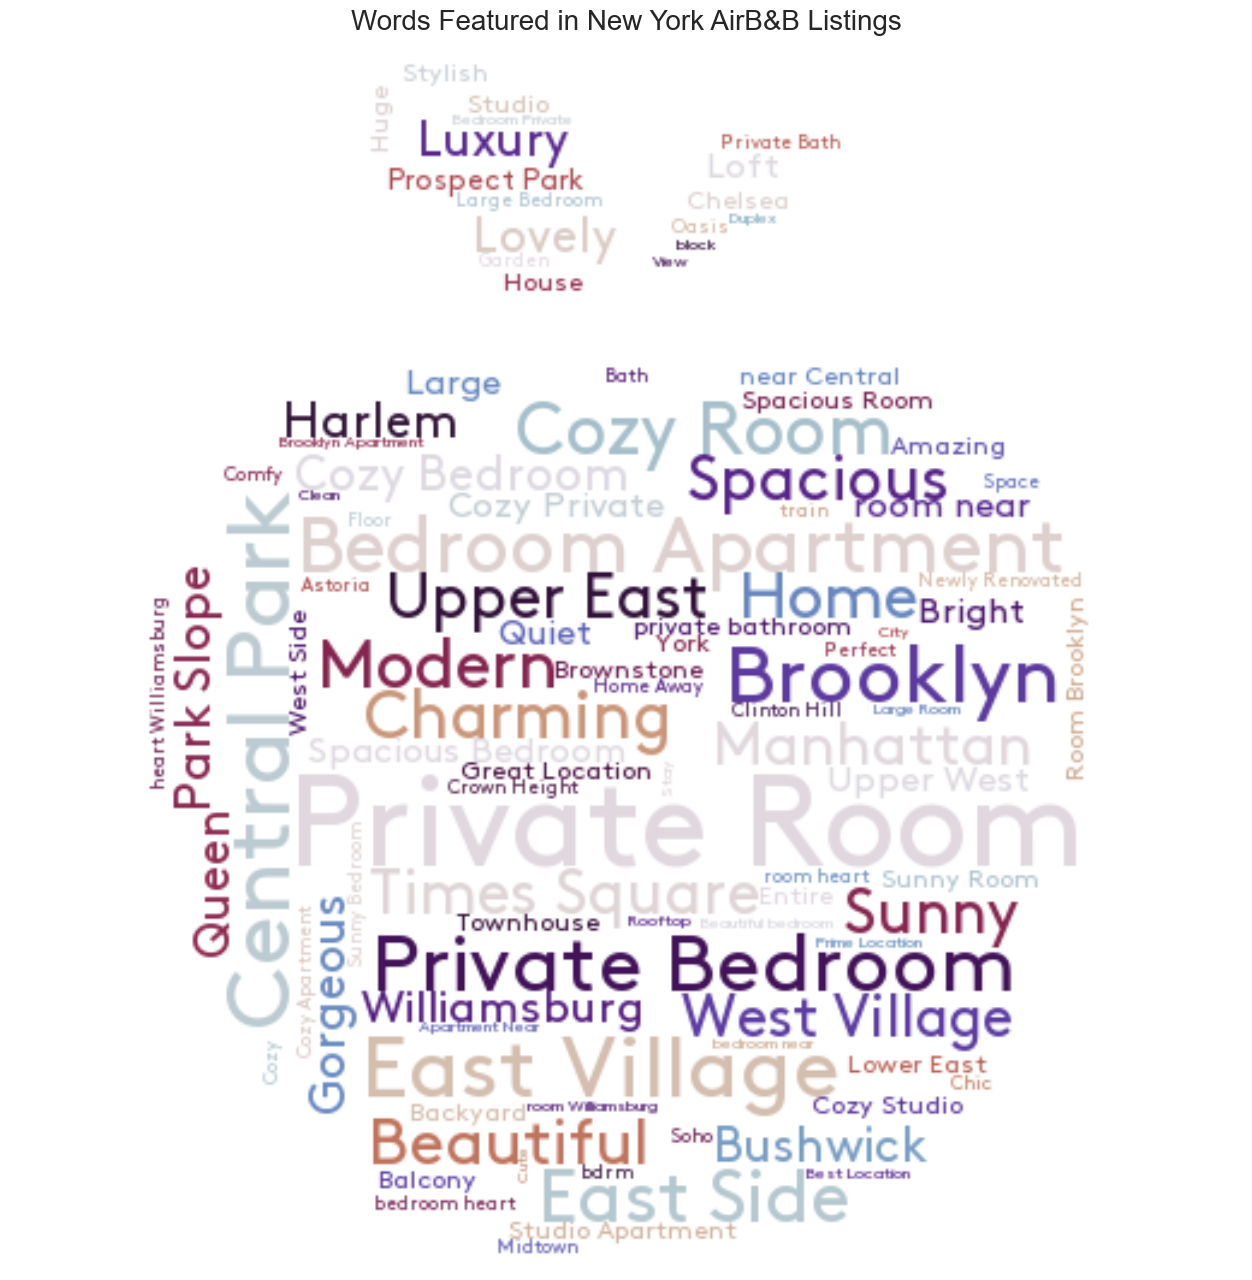

In [108]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

apple_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

custom_mask = np.where(apple_mask == 0, 255, 0)

wordcloud = WordCloud(
    font_path=font_path,
    stopwords=STOPWORDS,
    collocations=True,
    colormap='twilight',
    max_words=100,
    min_word_length=4,
    mask=custom_mask,
    background_color='white', 
)

wordcloud.generate(text_data)

plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Words Featured in New York AirB&B Listings', fontsize=20)
plt.axis("off")
plt.show()

In [86]:
mask = np.array(Image.open("/Users/alysaschoenfelder/Downloads/apple_mask_ny.png"))
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

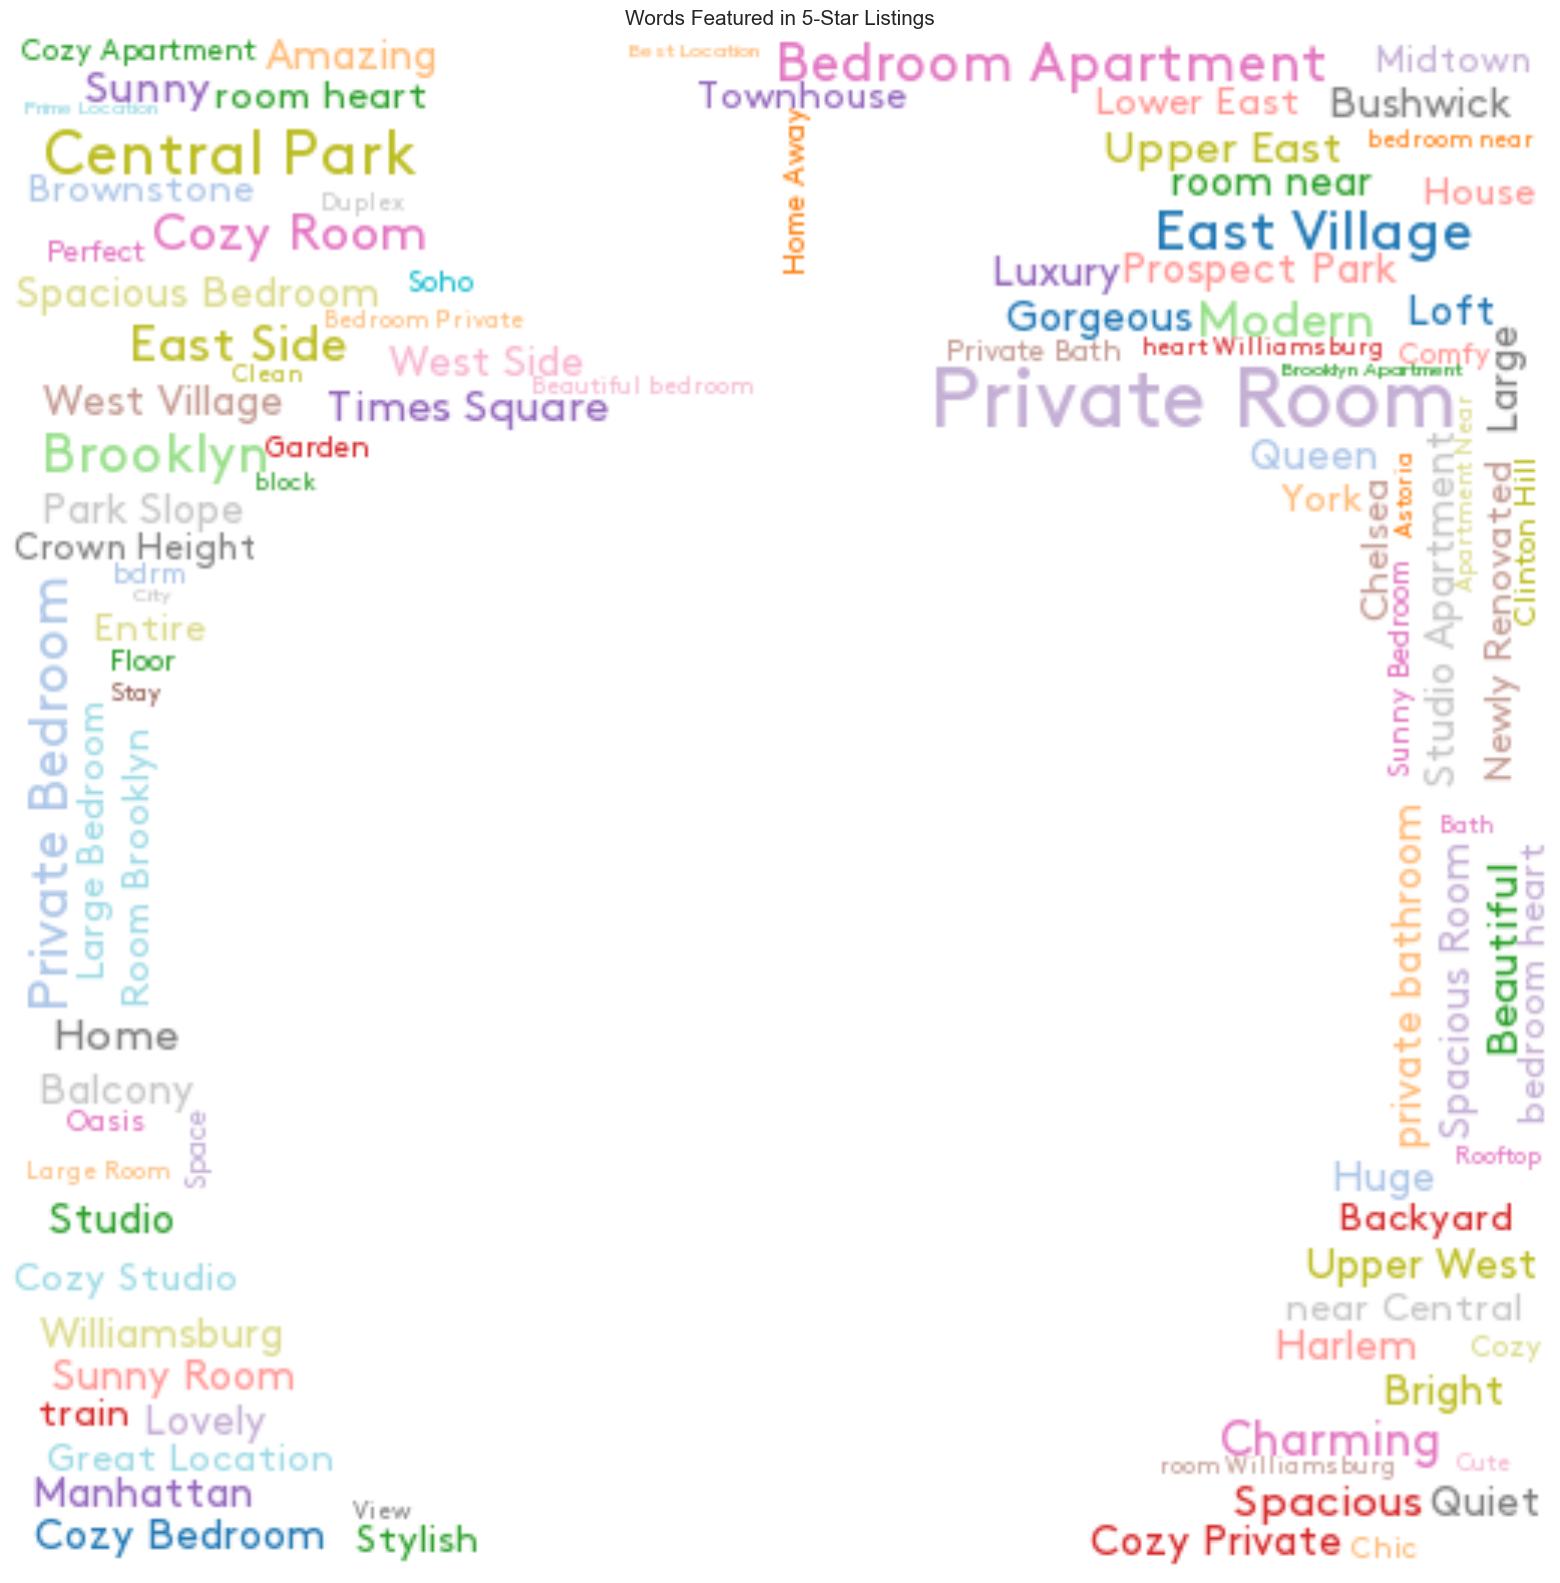

In [87]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

up_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

wordcloud = WordCloud(
                      background_color='white',
                      mask=up_mask,
                     font_path=font_path,
                    stopwords=STOPWORDS,
                    collocations=True,
                      colormap='tab20',
                      max_words=100,
                      min_word_length=4,
                     
                     
                     ).generate(text_data)

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Words Featured in 5-Star Listings', fontsize=15)
plt.axis("off")
plt.show()


In [84]:
mask = np.array(Image.open("/Users/alysaschoenfelder/Downloads/apple_mask_ny.png"))
def transform_zeros(array):
    return np.where(array == 0, 255, array)

maskable_image = np.apply_along_axis(transform_zeros, 1, mask)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

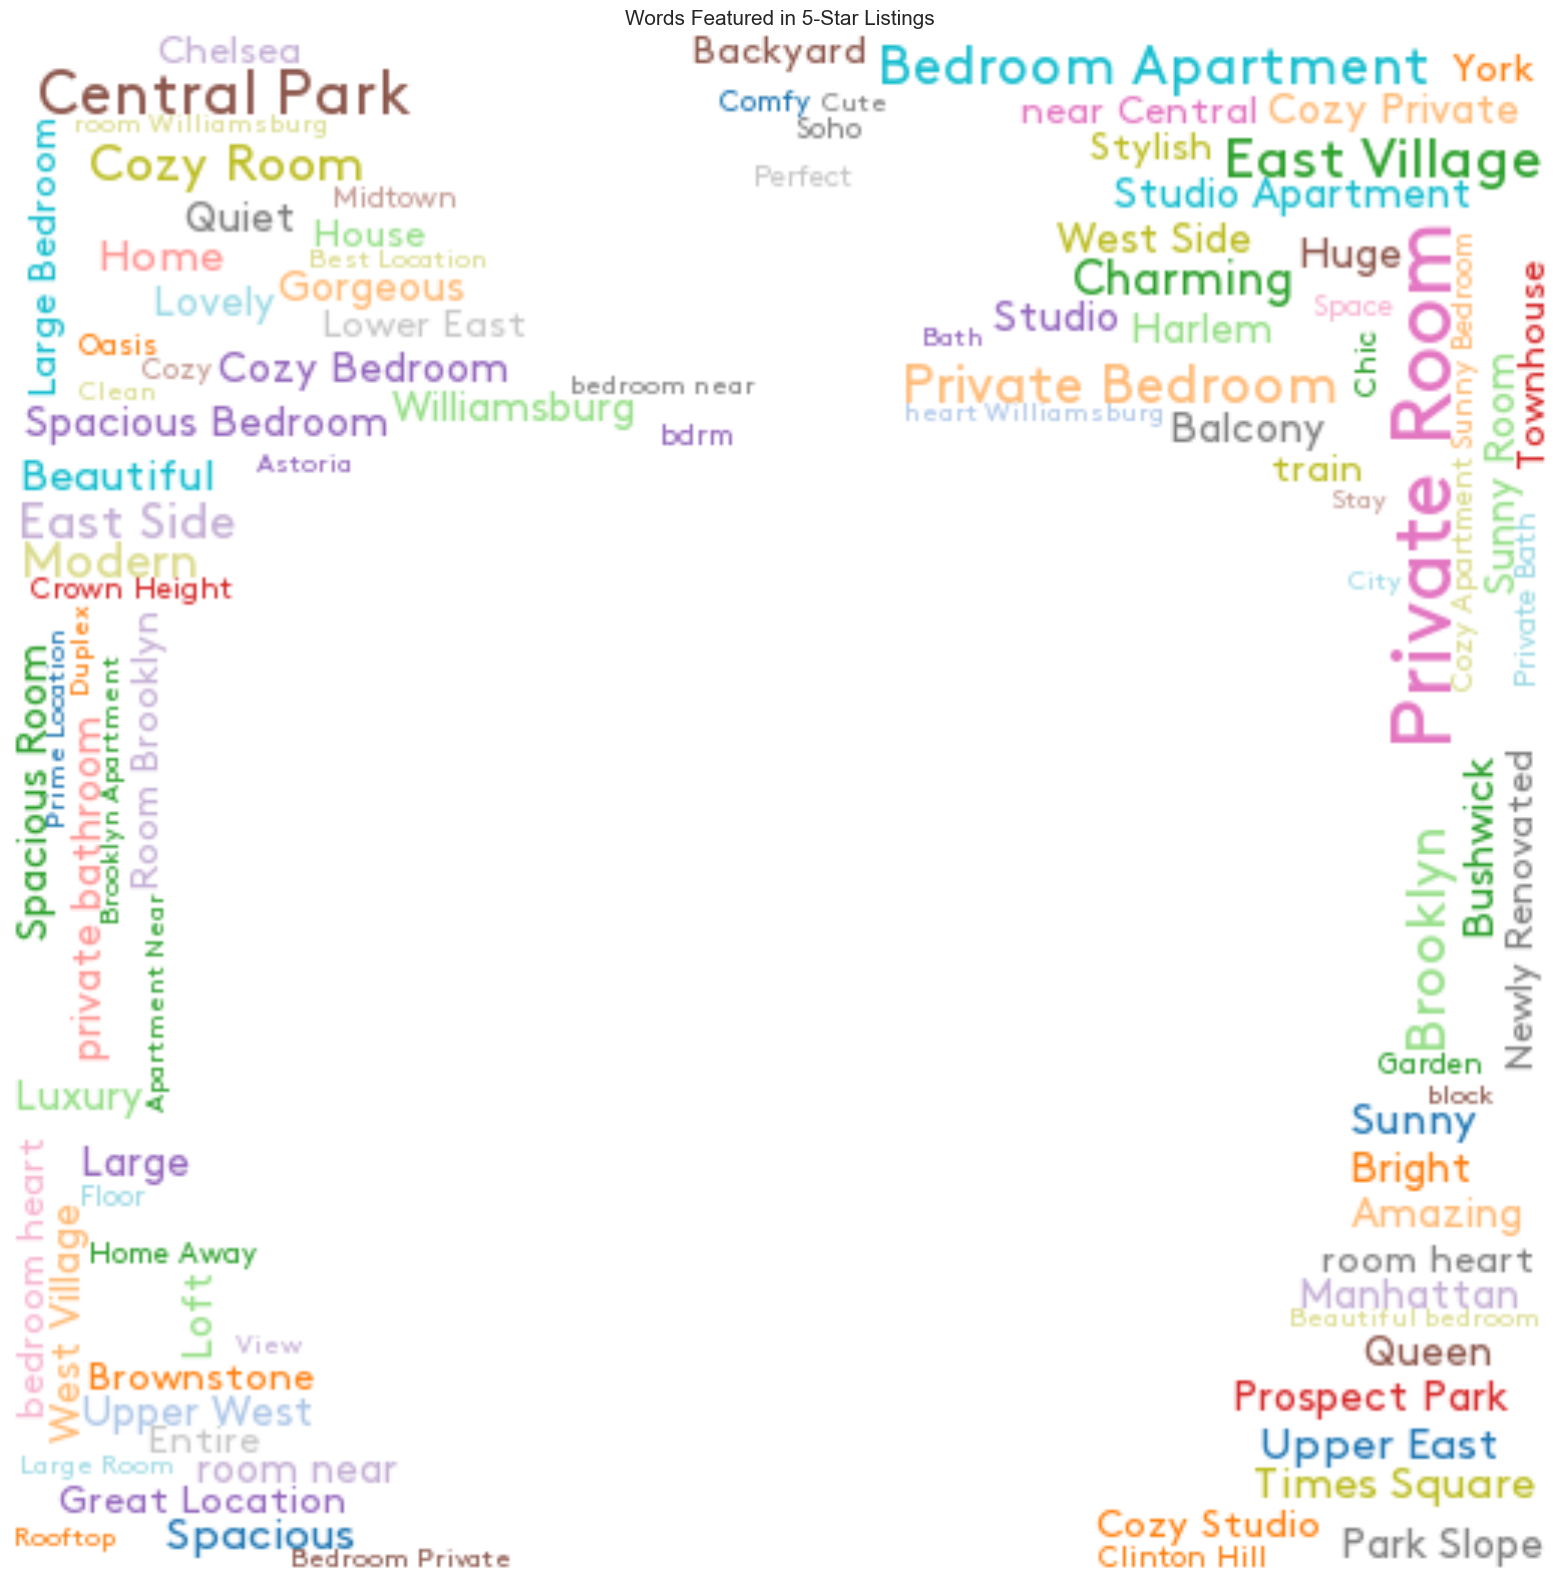

In [85]:
font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

data['Name'] = data['Name'].fillna('')
text_data = ' '.join(data['Name'].astype(str))

up_mask = np.array(Image.open('/Users/alysaschoenfelder/Downloads/apple_mask_ny.png'))

wordcloud = WordCloud(
                      background_color='white',
                      mask=up_mask,
                     font_path=font_path,
                    stopwords=STOPWORDS,
                    collocations=True,
                      colormap='tab20',
                      max_words=100,
                      min_word_length=4,
                     
                     
                     ).generate(text_data)

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Words Featured in 5-Star Listings', fontsize=15)
plt.axis("off")
plt.show()


In [70]:
one_star = data[data['Rating'] == 1]
one_star

id                                              Name    Borough  \
0        2431241                 Beautiful Central Harlem sleeps 4  Manhattan   
1        3877162     Bushwick Room w/ Private Entrance & Bathroom!   Brooklyn   
3        6416638               Private room in hip & historic area   Brooklyn   
48      40084846                 Beautiful Central Harlem sleeps 4  Manhattan   
49      40567003               Private room in hip & historic area   Brooklyn   
...          ...                                               ...        ...   
102565  45067696       BEAUTIFUL BROWNSTONE STUDIO IN SOUTH HARLEM  Manhattan   
102566  45068248     Beautiful 1 bedroom Apartment in Midtown East  Manhattan   
102568  49551820                            nice room in bedstuy G   Brooklyn   
102569  49552372  Gorgeous Sunset-facing Carroll Gardens 1 Bedroom   Brooklyn   
102594  57361342            Sunny budget friendly room in Bushwick   Brooklyn   

             Neighbourhood       Lat       Lon Instant_Booking  \
0                   Harlem  40.80861 -73.94574           False   
1                 Bushwick  40.70322 -73.92913            True   
3       Bedford-Stuyvesant  40.68346 -73.95551           False   
48                  Harlem  40.80861 -73.94574            True   
49      Bedford-Stuyvesant  40.68346 -73.95551           False   
...                    ...       ...       ...             ...   
102565              Harlem  40.80514 -73.95115            True   
102566             Midtown  40.75242 -73.97112           False   
102568  Bedford-Stuyvesant  40.68403 -73.94979           False   
102569             Gowanus  40.67963 -73.98951            True   
102594            Bushwick  40.69370 -73.91006            True   

       Cancellation_Policy        Room_Type  Construction_Year  \
0                 moderate  Entire home/apt             2014.0   
1                   strict     Private room             2020.0   
3                   strict     Private room             2017.0   
48                  strict  Entire home/apt             2014.0   
49                moderate     Private room             2017.0   
...                    ...              ...                ...   
102565              strict  Entire home/apt             2022.0   
102566            moderate     Private room             2006.0   
102568            flexible     Private room             2022.0   
102569              strict  Entire home/apt             2010.0   
102594            flexible     Private room             2016.0   

        Price_Per_Night  Total_Reviews  Rating  \
0                1200.0          123.0     1.0   
1                1200.0           16.0     1.0   
3                1200.0           30.0     1.0   
48               1200.0          123.0     1.0   
49               1200.0           30.0     1.0   
...                 ...            ...     ...   
102565              NaN           98.0     1.0   
102566              NaN            0.0     1.0   
102568              NaN           87.0     1.0   
102569              NaN            0.0     1.0   
102594              NaN            3.0     1.0   

                                              House_Rules  
0       No smoking in the unit ( strict)  No pets (str...  
1                            No smoking in the apartment.  
3                                                     NaN  
48                                                    NaN  
49                                                    NaN  
...                                                   ...  
102565  Be yourself, but please no wild parties, thank...  
102566                                                NaN  
102568  Smoking whatever is your preference is ok on t...  
102569  No Smoking.  Smoke alarms will sound (not just...  
102594  Please be mindful that I live in the same buil...  

[9212 rows x 14 columns]

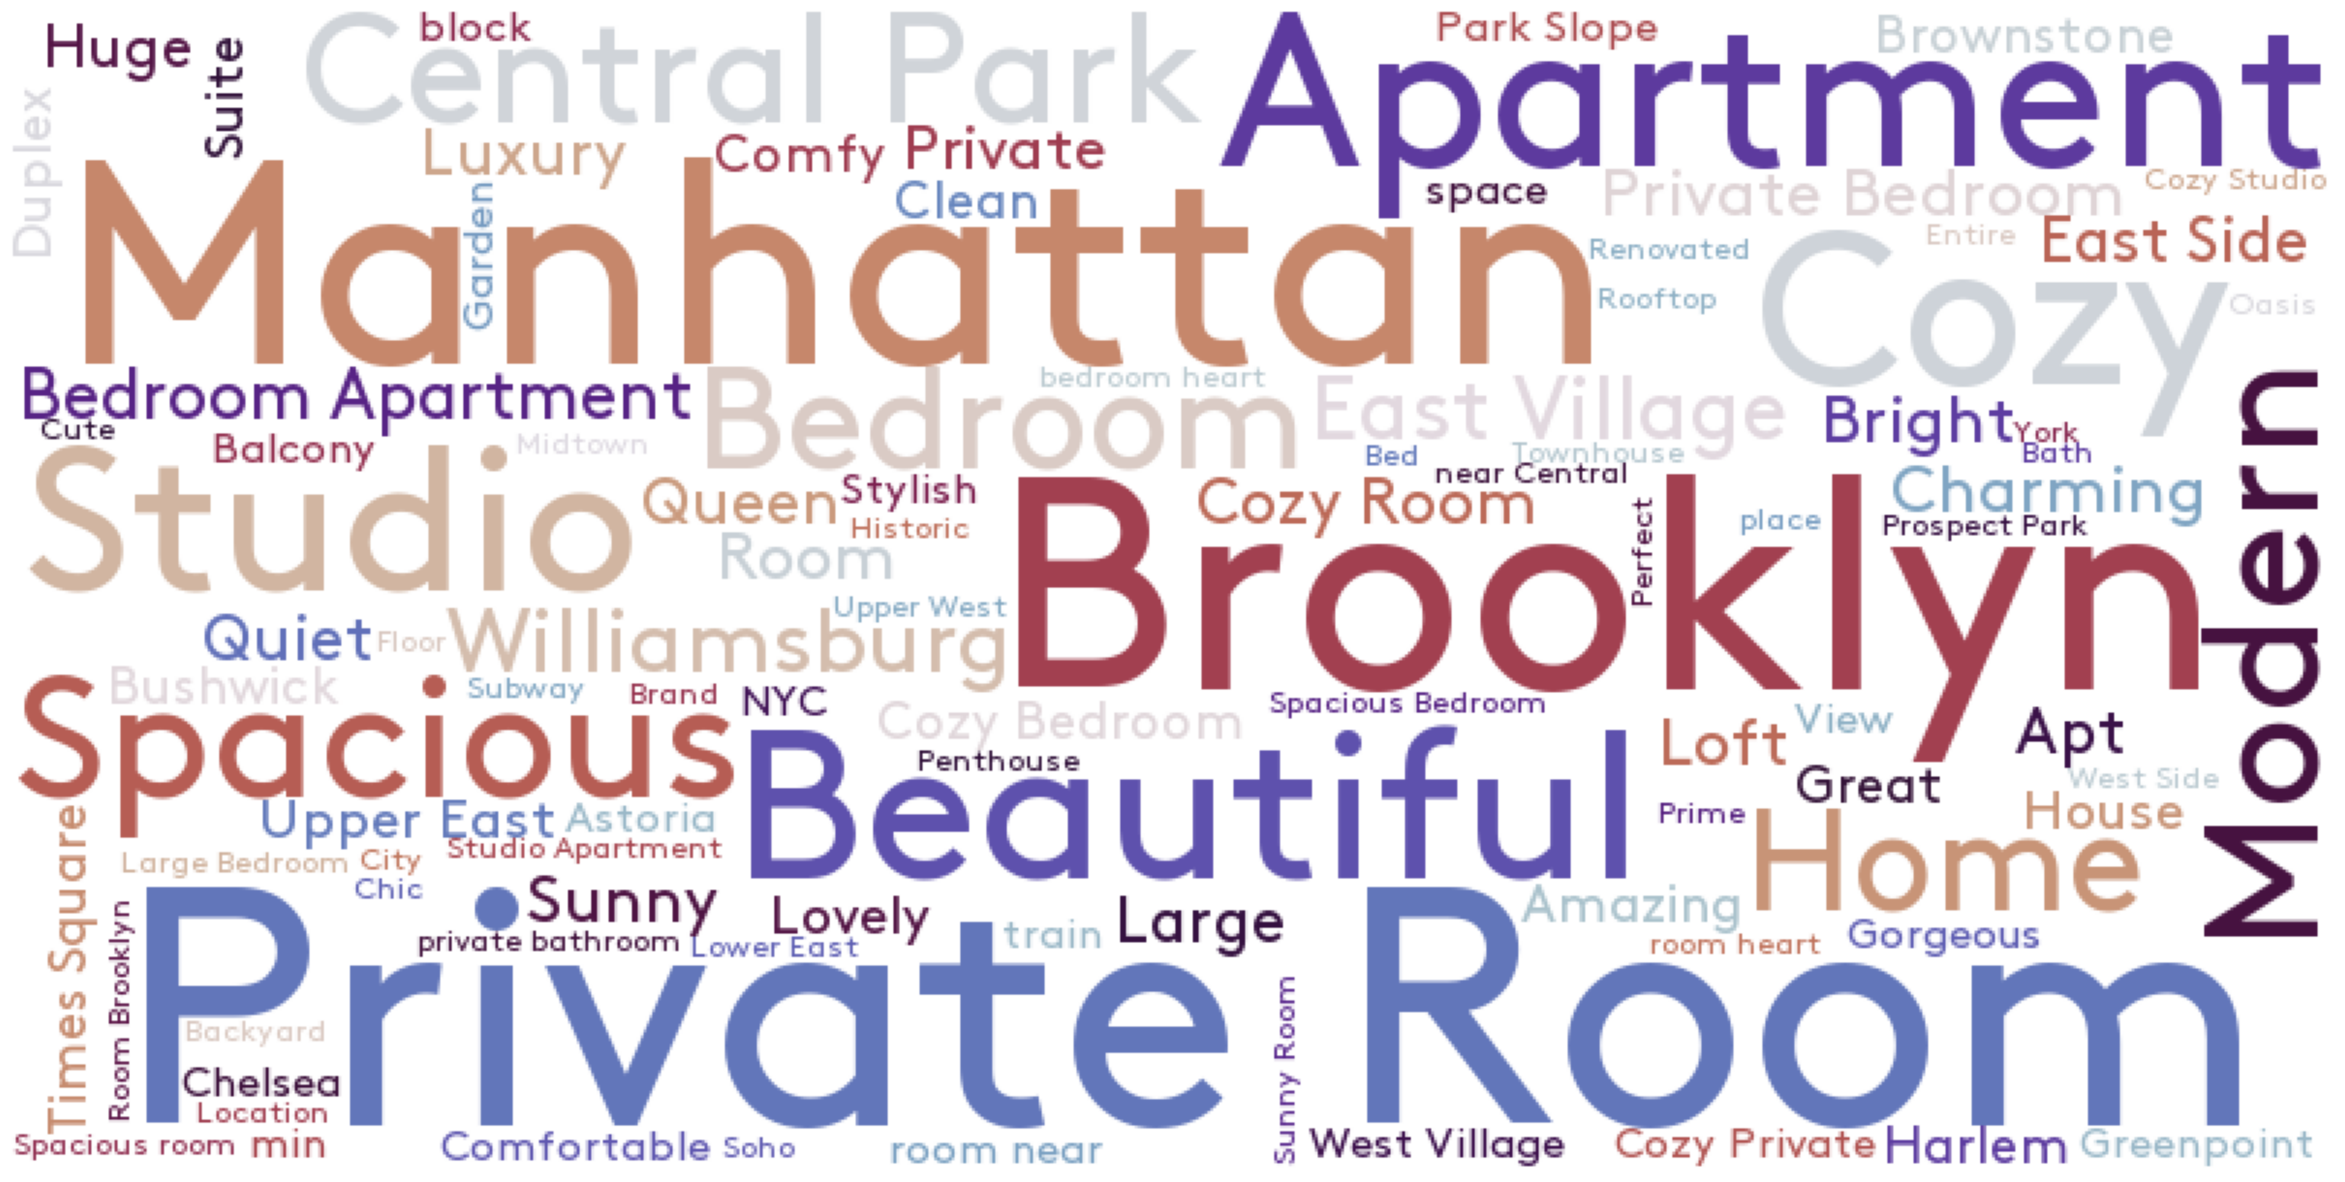

In [71]:
one_star = data[data['Rating'] == 1]

filtered_words = [word for word in text_data.split() if len(word) >= 4]
filtered_text = ' '.join(filtered_words)

font_path = "/Users/alysaschoenfelder/Downloads/brown-regular.ttf"

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                     font_path=font_path,
                    stopwords=STOPWORDS,
                      colormap='twilight_r',
                    collocations=True,
                      max_words=100,
                     ).generate(filtered_text)

plt.subplots(figsize=(30,30))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [72]:


words_to_remove = ['from', 'with']

one_star_reviews = data[data['Rating'] == 1]

# Join the text from 1-star reviews
one_star_text = ' '.join(one_star_reviews['Name'])

# Split the text into words and convert them to lowercase, filtering words with less than 4 letters and removing specified words
one_star_words = [word.lower() for word in one_star_text.split() if len(word) >= 4 and word.lower() not in words_to_remove]

# Create a DataFrame to count word occurrences
word_counts_df = pd.DataFrame(pd.Series(one_star_words).value_counts().reset_index())
word_counts_df.columns = ['Word', 'Count']

# Sort the DataFrame by word count in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Select the top 25 words
one_star_25_words_df = word_counts_df.head(25)

print(one_star_25_words_df)


            Word  Count
0           room   1782
1        bedroom   1440
2        private   1374
3      apartment   1140
4           cozy    897
5         studio    740
6       brooklyn    730
7       spacious    682
8           east    662
9          sunny    641
10          park    527
11     manhattan    469
12  williamsburg    468
13     beautiful    466
14         large    414
15          loft    409
16       village    398
17          near    379
18         heart    362
19        modern    328
20         upper    311
21       central    308
22          side    298
23          west    296
24        luxury    288


In [75]:

words_to_remove = ['from', 'with']

five_star_reviews = data[data['Rating'] == 5]

# Join the text from 1-star reviews
five_star_text = ' '.join(five_star_reviews['Name'])

# Split the text into words and convert them to lowercase, filtering words with less than 4 letters and removing specified words
five_star_words = [word.lower() for word in five_star_text.split() if len(word) >= 4 and word.lower() not in words_to_remove]

# Create a DataFrame to count word occurrences
five_counts_df = pd.DataFrame(pd.Series(five_star_words).value_counts)
five_counts_df.columns = ['Word', 'Count']

# Sort the DataFrame by word count in descending order
five_counts_df = five_counts_df.sort_values(by='Count', ascending=False)

# Select the top 25 words
five_star_25_words_df = five_counts_df.head(25)

print(five_star_25_words_df)

ValueError: DataFrame constructor not properly called!

In [48]:
filtered_words = [word for word in text_data.split() if len(word) >= 4]
filtered_text = ' '.join(filtered_words)

one_star = data[data['Rating'] == 1]
five_star = data[data['Rating'] == 5]

one_star_text = ' '.join(one_star['Name'])
five_star_text = ' '.join(five_star['Name'])

one_star_words = set(one_star_text.lower().split())
five_star_words = set(five_star_text.lower().split())

unique_words_in_one_star = one_star_words - five_star_words

print("Unique words in 1-star reviews but not in 5-star reviews:")
print(unique_words_in_one_star)

Unique words in 1-star reviews but not in 5-star reviews:
{"50's1", 'depot!!!/us', 'city~east', ')!', 'w/fireplace', 'modern/renovated/best', 'fh', 'circle~fully', 'kids!', 'zions', 'clean/quiet/funky', 'natual', 'spaceous', 'building-', '3b.', '(full)', 'renovated/best', 'nyc.angus.5.', '1-6', 'manhattan-a', 'reviews,', '24-hour', 'hook!', 'astoria,queens', '(central', '(room201)7分钟拉瓜迪机场,19分钟肯尼迪机场｡皇后区法拉盛中心,地段超好｡#201', '101!', 'location/20', '2br/prime', 'renewed', '法拉盛summer家(c)closed', 'close-', 'dble', 'williamsburgh', 'staircase', '5131', 'hill~deal', 'morningsideheights/columbia', 'block+roof+private', 'rosa', 'save:', '❤️of', '(seva)', 'window*', 'בוויליאמסבורג', 'andrea', 'w/small', 'wang', 'br-5', 'apt-lovely,', 'toddler', 'centralpark-times', '10ft', 'cozy/bright', 'enchanting,', 'nyct02-3:', 'manhattan,new', 'cosi', 'europa', 'book-filled', 'artstuy', '5145', '159', 'av,2', '(b5)', 'nolita:', 'lighted', '7even', 'bds', 'twist', 'sq/central', 'maspeth,', 'north-', 'doorman,15'

In [51]:
word_counts = Counter(one_star_words)

for word, count in word_counts.items():
    print(f"'{word}': {count}")

'greenpoint': 1
'train.': 1
'50's1': 1
'depot!!!/us': 1
'city~east': 1
'skyline': 1
')!': 1
'w/fireplace': 1
'modern/renovated/best': 1
'fh': 1
'apartment!': 1
'bright,': 1
'la': 1
'kids!': 1
'circle~fully': 1
'desirable': 1
'zions': 1
'clean/quiet/funky': 1
'discount': 1
'cute,': 1
'natual': 1
'view-': 1
'desk': 1
'spaceous': 1
'cable': 1
'building-': 1
'all!': 1
'3b.': 1
'walking': 1
'24-hr': 1
'yard,': 1
'br/': 1
'urban': 1
'(full)': 1
'minutes.': 1
'renovated/best': 1
'nyc.angus.5.': 1
'chelsea!!': 1
'come': 1
'eden': 1
'apt+bath,': 1
'tiny': 1
'2-4': 1
'1-6': 1
'estates': 1
'★': 1
'1b': 1
'les/chinatown': 1
'manhattan-a': 1
'reviews,': 1
'24-hour': 1
'quite,': 1
'red': 1
'hook!': 1
'astoria,queens': 1
'(central': 1
'abcd': 1
'(room201)7分钟拉瓜迪机场,19分钟肯尼迪机场｡皇后区法拉盛中心,地段超好｡#201': 1
'romantic': 1
'location/20': 1
'2br/prime': 1
'heat': 1
'c': 1
'101!': 1
'renewed': 1
'soha': 1
'cute!': 1
'法拉盛summer家(c)closed': 1
'cats,': 1
'close-': 1
'casa': 1
'place,': 1
'deal!': 1
'city,': 1
'williams

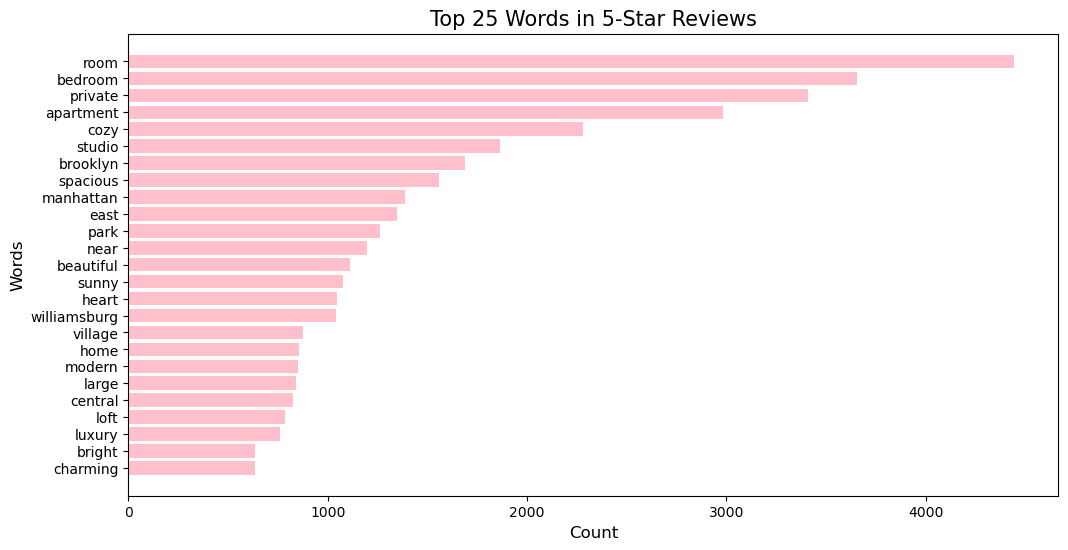

In [56]:
five_star_reviews = data[data['Rating'] == 5]
five_star_text = ' '.join(five_star_reviews['Name'])
words_to_remove = ['from', 'with']
five_star_words = [word.lower() for word in five_star_text.split() if len(word) >= 4 and word.lower() not in words_to_remove]
word_counts_df = pd.DataFrame(pd.Series(five_star_words).value_counts().reset_index())
word_counts_df.columns = ['Word', 'Count']
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)
top_25_words_df = word_counts_df.head(25)

plt.figure(figsize=(12, 6))
plt.barh(top_25_words_df['Word'], top_25_words_df['Count'], color='pink')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 25 Words in 5-Star Reviews', fontsize=15)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

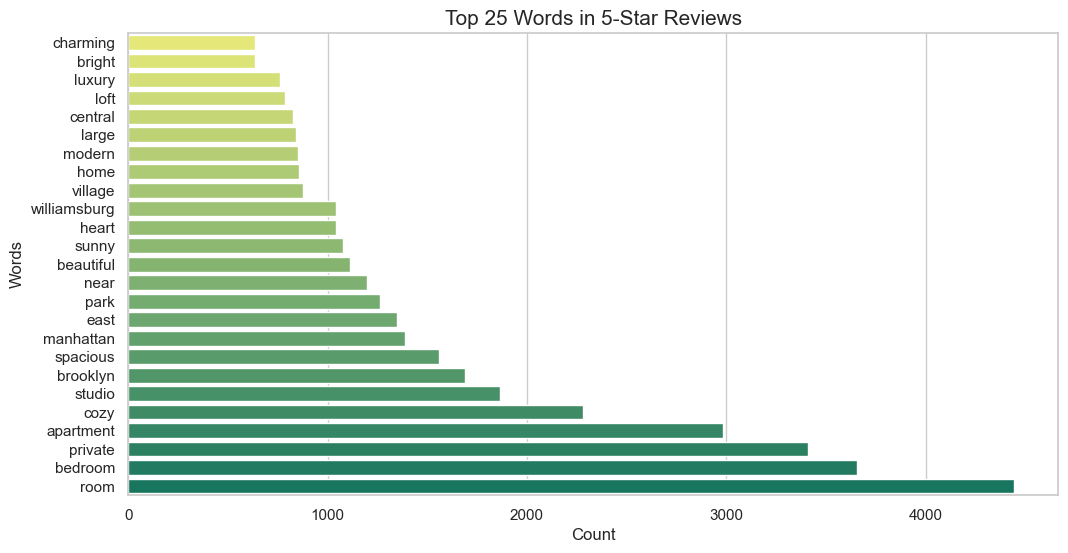

In [67]:
five_star_reviews = data[data['Rating'] == 5]
five_star_text = ' '.join(five_star_reviews['Name'])
words_to_remove = ['from', 'with']
five_star_words = [word.lower() for word in five_star_text.split() if len(word) >= 4 and word.lower() not in words_to_remove]
word_counts_df = pd.DataFrame(pd.Series(five_star_words).value_counts().reset_index())
word_counts_df.columns = ['Word', 'Count']
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)
                                           

plt.figure(figsize=(12, 6))
sns.barplot(data=top_25_words_df, x='Count', y='Word', palette='summer')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 25 Words in 5-Star Reviews', fontsize=15)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

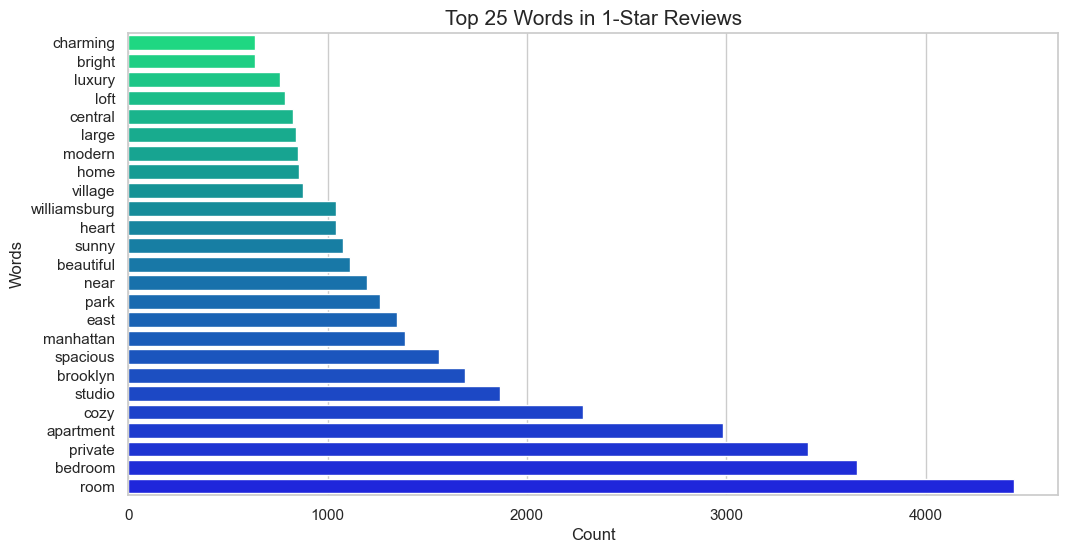

In [69]:
one_star_reviews = data[data['Rating'] == 1]
one_star_text = ' '.join(one_star_reviews['Name'])
words_to_remove = ['from', 'with']
one_star_words = [word.lower() for word in one_star_text.split() if len(word) >= 4 and word.lower() not in words_to_remove]
word_counts_df = pd.DataFrame(pd.Series(one_star_words).value_counts().reset_index())
word_counts_df.columns = ['Word', 'Count']
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)
                                           

plt.figure(figsize=(12, 6))
sns.barplot(data=top_25_words_df, x='Count', y='Word', palette='winter')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 25 Words in 1-Star Reviews', fontsize=15)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()         

In [ ]:
one_star_reviews = data[data['Rating'] == 1]
five_star_text = ' '.join(five_star_reviews['Name'])
words_to_remove = ['from', 'with']
five_star_words = [word.lower() for word in five_star_text.split() if len(word) >= 4 and word.lower() not in words_to_remove]
word_counts_df = pd.DataFrame(pd.Series(five_star_words).value_counts().reset_index())
word_counts_df.columns = ['Word', 'Count']
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False
                                           )
top_25_words_df = word_counts_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_25_words_df, x='Count', y='Word', palette='summer')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 25 Words in 5-Star Reviews', fontsize=15)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()